<a href="https://colab.research.google.com/github/bmaged23/EDA/blob/main/EDA_and_ML_for_titanic_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [637]:
!kaggle datasets download -d yasserh/titanic-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
titanic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [638]:
import zipfile
with zipfile.ZipFile("/content/titanic-dataset.zip","r") as file:
  file.extractall("/content/titanic-dataset")

In [639]:
import pandas as pd
import numpy as np

url="/content/titanic-dataset/Titanic-Dataset.csv"
df=pd.read_csv(url)
new_df=df
new_df=new_df.drop_duplicates()
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [662]:
from sklearn.tree import DecisionTreeClassifier

Y = new_df2.loc[new_df2["Survived"].notna(), "Survived"]  # Target variable with non-missing values
X = new_df2.loc[new_df2["Survived"].drop(columns="Survived")]

model=DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)
y_train_pred=model.predict(x_train)
print(f"train acc={accuracy_score(y_train,y_train_pred)}")

y_test_pred=model.predict(x_test)
print(f"test acc={accuracy_score(y_test,y_test_pred)}")

print(classification_report(y_test,y_test_pred))

train acc=0.9845505617977528
test acc=0.7374301675977654
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       105
           1       0.67      0.73      0.70        74

    accuracy                           0.74       179
   macro avg       0.73      0.74      0.73       179
weighted avg       0.74      0.74      0.74       179



In [640]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [641]:
new_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [642]:
new_df["Name"]=new_df["Name"].astype("category")
new_df["Sex"]=new_df["Sex"].astype("category")
new_df["Ticket"]=new_df["Ticket"].astype("category")
new_df["Cabin"]=new_df["Cabin"].astype("category")
new_df["Embarked"]=new_df["Embarked"].astype("category")




In [643]:
'''from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the columns you want to predict and impute
columns_to_impute = ["Age", "Cabin", "Embarked"]

# Prepare the data by dropping irrelevant columns
new_df2 = new_df.drop(columns=["PassengerId", "Name", "Ticket"])

# One-hot encode categorical variables
new_df2 = pd.get_dummies(new_df2, drop_first=True)

# Loop over each column that needs imputation
for col in columns_to_impute:
    # Split the data into X (features) and Y (target for the current column)
    Y = new_df2.loc[new_df2[col].notna(), col]  # Target variable with non-missing values
    X = new_df2.loc[new_df2[col].notna()].drop(columns=col)  # Features without the target columns

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train the KNN model
    model = KNeighborsClassifier()
    model.fit(X_scaled, Y)

    # Predict the missing values for the current column
    missing_X = new_df2.loc[new_df2[col].isna()].drop(columns=columns_to_impute)
    missing_X_scaled = scaler.transform(missing_X)
    predicted_values = model.predict(missing_X_scaled)

    # Fill the missing values in the original DataFrame
    new_df.loc[new_df[col].isna(), col] = predicted_values'''


'from sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.preprocessing import StandardScaler\nimport pandas as pd\n\n# Define the columns you want to predict and impute\ncolumns_to_impute = ["Age", "Cabin", "Embarked"]\n\n# Prepare the data by dropping irrelevant columns\nnew_df2 = new_df.drop(columns=["PassengerId", "Name", "Ticket"])\n\n# One-hot encode categorical variables\nnew_df2 = pd.get_dummies(new_df2, drop_first=True)\n\n# Loop over each column that needs imputation\nfor col in columns_to_impute:\n    # Split the data into X (features) and Y (target for the current column)\n    Y = new_df2.loc[new_df2[col].notna(), col]  # Target variable with non-missing values\n    X = new_df2.loc[new_df2[col].notna()].drop(columns=col)  # Features without the target columns\n\n    # Standardize the features\n    scaler = StandardScaler()\n    X_scaled = scaler.fit_transform(X)\n\n    # Train the KNN model\n    model = KNeighborsClassifier()\n    model.fit(X_scaled, Y)\n\n    # Pre

In [644]:
new_df["Age"]=new_df["Age"].fillna(np.ceil(new_df["Age"].median()))
new_df["Embarked"]=new_df["Embarked"].fillna(new_df["Embarked"].mode()[0])
new_df["Cabin"]=new_df["Cabin"].fillna(new_df["Cabin"].mode()[0])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    category
 11  Embarked     891 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 122.0 KB


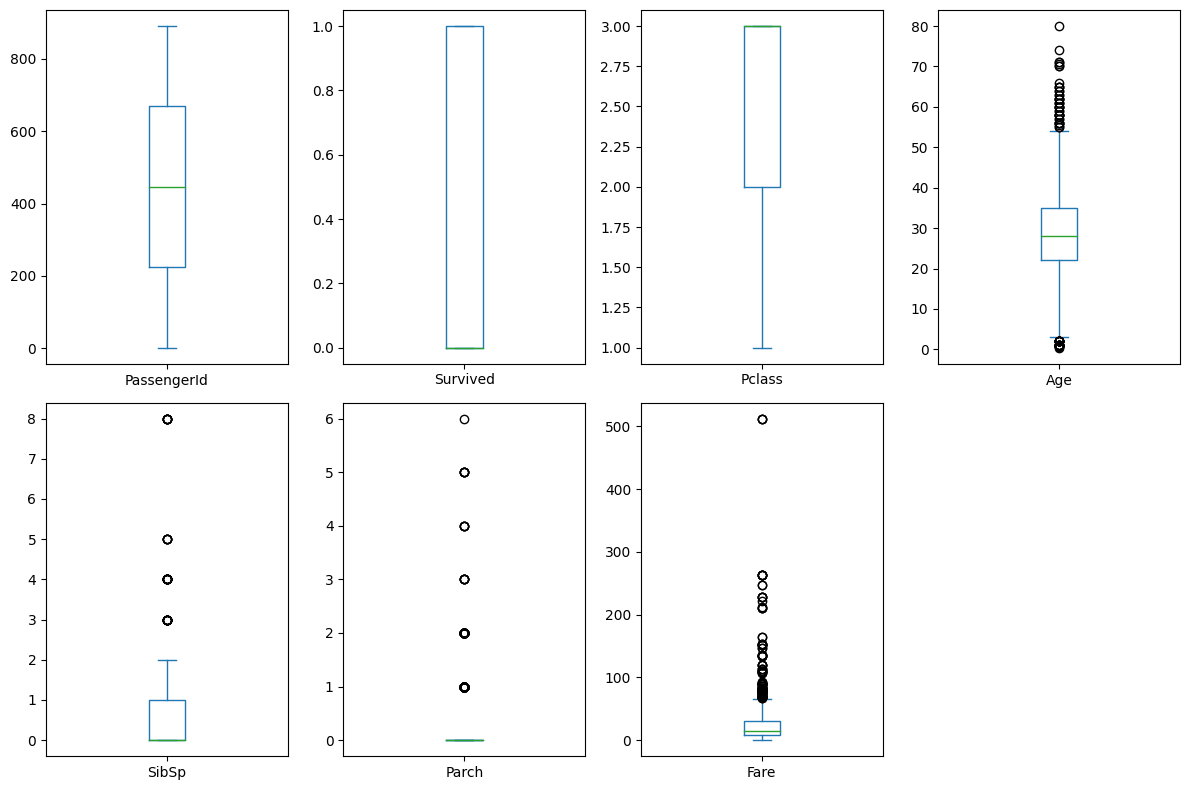

In [645]:
import matplotlib.pyplot as plt
new_df.plot(kind='box', subplots=True, layout=(2, -1), figsize=(12, 8))
plt.tight_layout()
plt.show()

In [646]:
print(new_df[new_df["Age"]>60].count())
print(new_df[new_df["Fare"]>150].count())
print(new_df[new_df["SibSp"]>3].count())

new_df.loc[new_df["Age"] < 1, "Age"] = 1
'''
new_df=new_df[new_df["Fare"]<100]
new_df=new_df[new_df["Age"]<60]'''
new_df

PassengerId    22
Survived       22
Pclass         22
Name           22
Sex            22
Age            22
SibSp          22
Parch          22
Ticket         22
Fare           22
Cabin          22
Embarked       22
dtype: int64
PassengerId    29
Survived       29
Pclass         29
Name           29
Sex            29
Age            29
SibSp          29
Parch          29
Ticket         29
Fare           29
Cabin          29
Embarked       29
dtype: int64
PassengerId    30
Survived       30
Pclass         30
Name           30
Sex            30
Age            30
SibSp          30
Parch          30
Ticket         30
Fare           30
Cabin          30
Embarked       30
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [647]:
col=list(new_df.columns)
for cl in col:
  print(cl)
  print(new_df[cl].unique())

PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


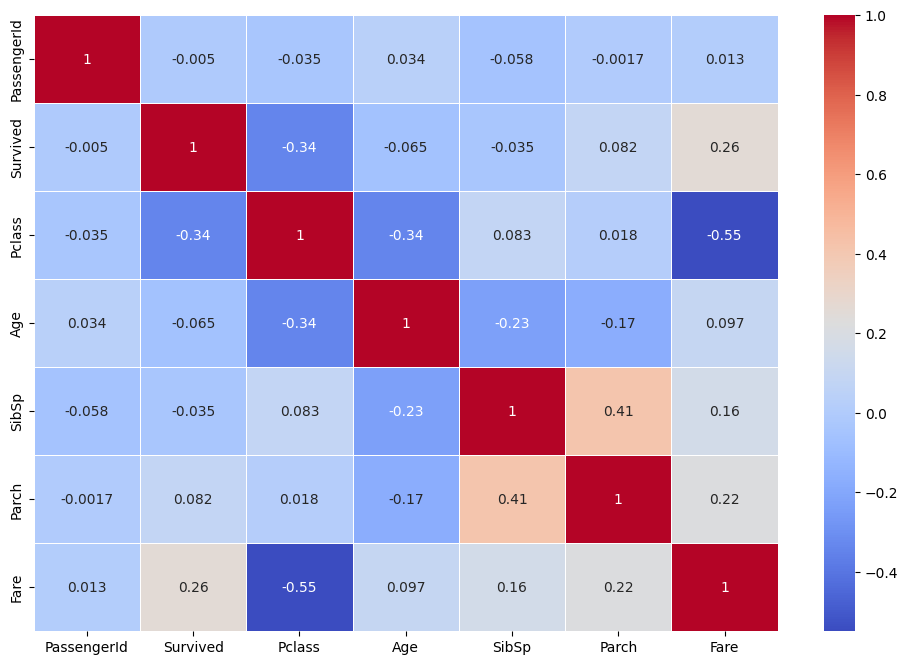

In [648]:
import seaborn as sns
col=list(new_df.columns)
print(col)
num_df=new_df[col[0:3]+col[5:8]+[col[9]]]
corr=num_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


In [649]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

new_df=new_df.drop(columns=["PassengerId","Name","Ticket"])


In [650]:
col=list(new_df.columns)
print(col)
el=LabelEncoder()
for cl in ["SibSp","Parch","Cabin"]:
  new_df[cl]=el.fit_transform(new_df[cl])
Y=new_df[col[0]]
X=new_df[col[1:]]
X=pd.get_dummies(X)
scale=StandardScaler()
col=list(X.columns)
X=pd.DataFrame(scale.fit_transform(X),columns=col)

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']


In [651]:
print(X)
print(Y)

       Pclass       Age     SibSp     Parch      Fare     Cabin  Sex_female  \
0    0.827377 -0.566090  0.490044 -0.473674 -0.502445 -0.281881   -0.737695   
1   -1.566107  0.663933  0.490044 -0.473674  0.786845  1.161545    1.355574   
2    0.827377 -0.258584 -0.504555 -0.473674 -0.488854 -0.281881    1.355574   
3   -1.566107  0.433304  0.490044 -0.473674  0.420730  0.057748    1.355574   
4    0.827377  0.433304 -0.504555 -0.473674 -0.486337 -0.281881   -0.737695   
..        ...       ...       ...       ...       ...       ...         ...   
886 -0.369365 -0.181708 -0.504555 -0.473674 -0.386671 -0.281881   -0.737695   
887 -1.566107 -0.796720 -0.504555 -0.473674 -0.044381 -1.003594    1.355574   
888  0.827377 -0.104832  0.490044  2.008933 -0.176263 -0.281881    1.355574   
889 -1.566107 -0.258584 -0.504555 -0.473674 -0.044381  0.270017   -0.737695   
890  0.827377  0.202674 -0.504555 -0.473674 -0.492378 -0.281881   -0.737695   

     Sex_male  Embarked_C  Embarked_Q  Embarked_S  

In [652]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [653]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train, y_train)
y_train_pred=model.predict(x_train)
print(f"train acc={accuracy_score(y_train,y_train_pred)}")

y_test_pred=model.predict(x_test)
print(f"test acc={accuracy_score(y_test,y_test_pred)}")

print(classification_report(y_test,y_test_pred))

train acc=0.8679775280898876
test acc=0.8100558659217877
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [654]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)
y_train_pred=model.predict(x_train)
print(f"train acc={accuracy_score(y_train,y_train_pred)}")

y_test_pred=model.predict(x_test)
print(f"test acc={accuracy_score(y_test,y_test_pred)}")

print(classification_report(y_test,y_test_pred))

train acc=0.9845505617977528
test acc=0.7374301675977654
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       105
           1       0.67      0.73      0.70        74

    accuracy                           0.74       179
   macro avg       0.73      0.74      0.73       179
weighted avg       0.74      0.74      0.74       179



In [655]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train, y_train)
y_train_pred=model.predict(x_train)
print(f"train acc={accuracy_score(y_train,y_train_pred)}")

y_test_pred=model.predict(x_test)
print(f"test acc={accuracy_score(y_test,y_test_pred)}")

print(classification_report(y_test,y_test_pred))

train acc=0.8455056179775281
test acc=0.8212290502793296
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [656]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import LinearSVC

#model=SVC()
#model.fit(x_train,y_train)
model = LinearSVC(class_weight={0:20,1:150},penalty='l2', dual=False, C=0.3, random_state=42)  # C is the regularization parameter
model.fit(x_train, y_train)
y_train_pred=model.predict(x_train)
print(f"train acc={accuracy_score(y_train,y_train_pred)}")

y_test_pred=model.predict(x_test)
print(f"test acc={accuracy_score(y_test,y_test_pred)}")

print(classification_report(y_test,y_test_pred))

train acc=0.49297752808988765
test acc=0.5027932960893855
              precision    recall  f1-score   support

           0       0.94      0.16      0.28       105
           1       0.45      0.99      0.62        74

    accuracy                           0.50       179
   macro avg       0.70      0.57      0.45       179
weighted avg       0.74      0.50      0.42       179



In [657]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

#model=SVC()
#model.fit(x_train,y_train)
model = LogisticRegression(class_weight={0:20,1:150},penalty='l2', dual=False, C=0.3, random_state=42)  # C is the regularization parameter
model.fit(x_train, y_train)
y_train_pred=model.predict(x_train)
print(f"train acc={accuracy_score(y_train,y_train_pred)}")

y_test_pred=model.predict(x_test)
print(f"test acc={accuracy_score(y_test,y_test_pred)}")

print(classification_report(y_test,y_test_pred))

train acc=0.5716292134831461
test acc=0.553072625698324
              precision    recall  f1-score   support

           0       0.93      0.26      0.40       105
           1       0.48      0.97      0.64        74

    accuracy                           0.55       179
   macro avg       0.71      0.62      0.52       179
weighted avg       0.74      0.55      0.50       179



Survived
0    549
1    342
Name: count, dtype: int64


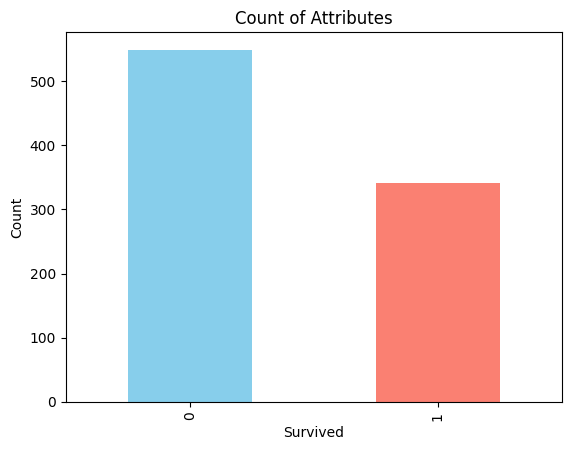

In [658]:
import pandas as pd
import matplotlib.pyplot as plt

bar_df = new_df['Survived'].value_counts()
print(bar_df)
bar_df.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of Attributes')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()